# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Indest Data

In [124]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE', parse_dates=True)
df.head()

IPN31152N
DATE                 
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [126]:
df.shape

(573, 1)

In [127]:
df.describe()

IPN31152N
count  573.000000
mean   109.895545
std     27.950571
min     58.659800
25%     88.935500
50%    107.643000
75%    128.277700
max    196.173700

In [128]:
df.isnull().sum()

IPN31152N    0
dtype: int64

In [129]:
df.duplicated().sum()

0

In [130]:
df.columns

Index(['IPN31152N'], dtype='object')

In [131]:
df.rename(columns={"IPN31152N" :"Production"}, inplace=True)

In [132]:
df.columns

Index(['Production'], dtype='object')

In [133]:
df.head()

Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636

In [134]:
df.tail()

Production
DATE                  
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    101.5866

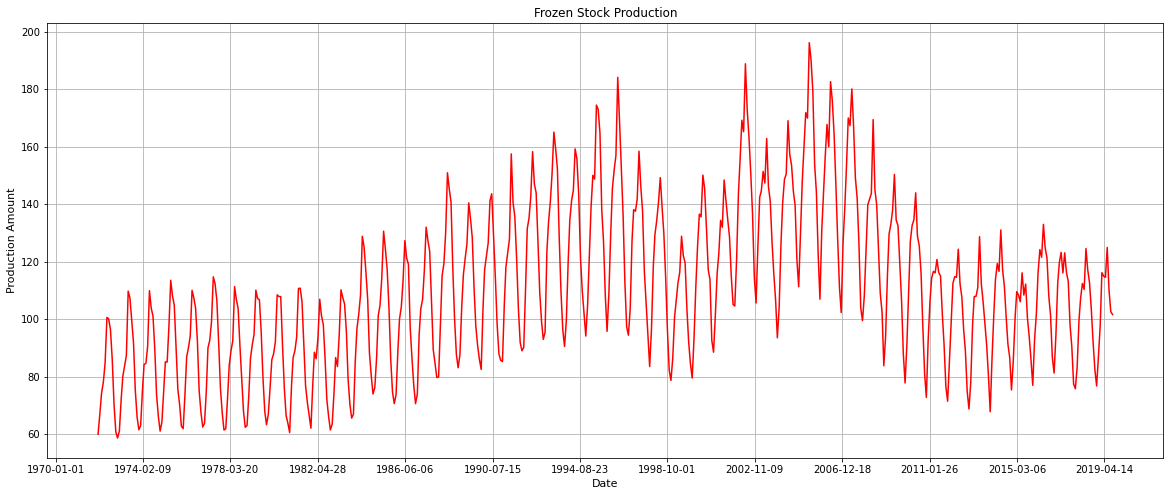

In [135]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df["Production"],color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Production Amount', fontsize='11')
plt.title('Frozen Stock Production')
plt.grid()
plt.show()


In [136]:
df.iloc[df["Production"].argmax()]

Production    196.1737
Name: 2005-06-01 00:00:00, dtype: float64

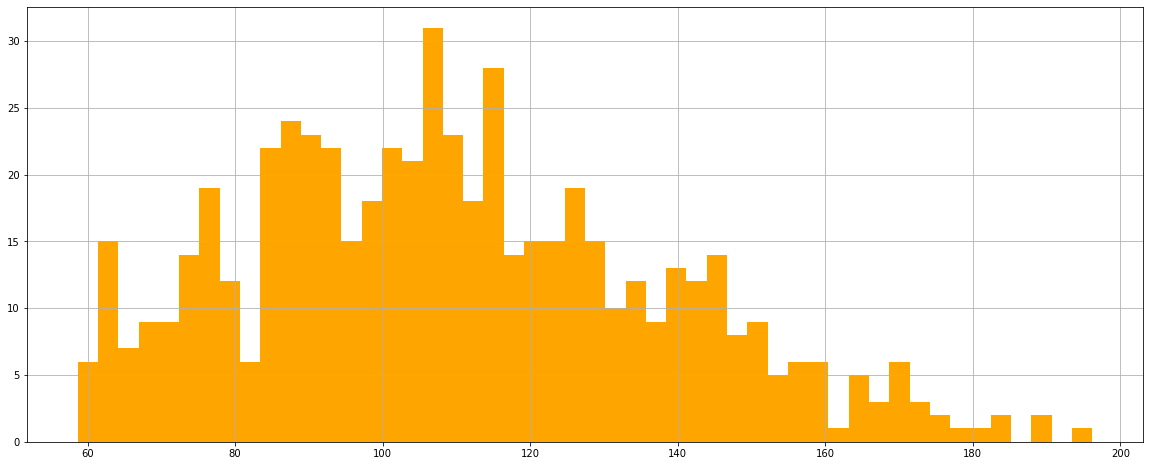

In [137]:
df['Production'].hist(bins=50, color='orange',figsize=(20,8));

In [138]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df)

<AxesSubplot:xlabel='DATE'>

## Preprocessing of Data

### Train Test Split

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
len(df)

573

In [141]:
test_size = 24

In [142]:
test_len = len(df)-test_size

In [143]:
test_ind = len(df)- test_size
test_ind

549

In [144]:
train = df.iloc[:test_ind]

test = df.iloc[test_ind:]

In [145]:
train 

Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
...                ...
2017-05-01    116.0635
2017-06-01    123.0870
2017-07-01    116.2639
2017-08-01    113.1717
2017-09-01     97.9125

[549 rows x 1 columns]

In [146]:
test 

Production
DATE                  
2017-10-01     90.4732
2017-11-01     77.4378
2017-12-01     75.8118
2018-01-01     83.4343
2018-02-01     99.4899
2018-03-01    107.3152
2018-04-01    112.4309
2018-05-01    110.3544
2018-06-01    124.5841
2018-07-01    117.2215
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    101.5866

### Scaling

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler = MinMaxScaler()

In [149]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [150]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [151]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [152]:
len(generator)

537

In [153]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [154]:
X, y = generator[0]

In [155]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [350]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [431]:
n_features = train_scaled.shape[1]

In [432]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features))) #return_sequences=True, 
#model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [433]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 100)               40800     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [434]:
from tensorflow.keras.callbacks import EarlyStopping

In [435]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [436]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [437]:
len(validation_generator)

12

In [438]:
model.fit_generator(generator,
                    epochs = 35,
                    validation_data = validation_generator,
                   callbacks = [early_stop])

Epoch 1/35
561/561 [==============================] - 5s 7ms/step - loss: 0.0172 - val_loss: 0.0018
Epoch 2/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 3/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 4/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 5/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 6/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 8/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 9/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 10/35
561/561 [==============================] - 3s 6ms/step - loss: 0.0032 - val_loss: 0.0021

In [439]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<AxesSubplot:>

#### Evaluate on Test Data

In [440]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [441]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [442]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [443]:
predictions_scaled

[array([0.23861687], dtype=float32),
 array([0.20999931], dtype=float32),
 array([0.22815198], dtype=float32),
 array([0.28310072], dtype=float32),
 array([0.34671855], dtype=float32),
 array([0.40072775], dtype=float32),
 array([0.43962806], dtype=float32),
 array([0.45967996], dtype=float32),
 array([0.45968187], dtype=float32),
 array([0.43114674], dtype=float32),
 array([0.3789819], dtype=float32),
 array([0.31214023], dtype=float32)]

#### Inverse Transformations and Comparing

In [444]:
predictions = scaler.inverse_transform(predictions_scaled)

In [445]:
compare = test[:12]

In [446]:
compare['Predictions'] = predictions

In [447]:
compare

Production  Predictions
DATE                               
2017-10-01     90.4732    91.472936
2017-11-01     77.4378    87.537624
2017-12-01     75.8118    90.033868
2018-01-01     83.4343    97.590085
2018-02-01     99.4899   106.338420
2018-03-01    107.3152   113.765436
2018-04-01    112.4309   119.114770
2018-05-01    110.3544   121.872184
2018-06-01    124.5841   121.872447
2018-07-01    117.2215   117.948470
2018-08-01    112.6779   110.775077
2018-09-01    103.3118   101.583420

In [448]:
compare.plot(figsize = (10, 4))
plt.show()

#### Calculation R2 Score and Error Metrics

In [449]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7222500552275766 
mae: 0.04729682378967751 
mse: 0.0034637192362079443 
rmse: 0.058853370644406974


### with "relu" activation function

In [177]:
n_features = train_scaled.shape[1]

In [212]:
model = Sequential()
model.add(LSTM(100, activation = 'relu',  input_shape = (length, n_features)))#return_sequences=True,
#model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [213]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [214]:
from tensorflow.keras.callbacks import EarlyStopping

In [215]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [216]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [217]:
len(validation_generator)

12

In [218]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
561/561 [==============================] - 4s 6ms/step - loss: 0.0215 - val_loss: 0.0047
Epoch 2/20
561/561 [==============================] - 3s 6ms/step - loss: 0.0109 - val_loss: 0.0036
Epoch 3/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0100
Epoch 4/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 5/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 6/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 7/20
561/561 [==============================] - 2s 4ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 8/20
561/561 [==============================] - 2s 4ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 9/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 10/20
561/561 [==============================] - 3s 5ms/step - loss: 0.0031 - val_loss: 0.0015

<AxesSubplot:>

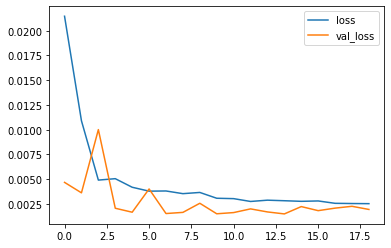

In [219]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [220]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [221]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [222]:
predictions_scaled

[array([0.21564627], dtype=float32),
 array([0.16318125], dtype=float32),
 array([0.16913536], dtype=float32),
 array([0.24563056], dtype=float32),
 array([0.34051093], dtype=float32),
 array([0.40539902], dtype=float32),
 array([0.45377037], dtype=float32),
 array([0.5009078], dtype=float32),
 array([0.52870446], dtype=float32),
 array([0.5028221], dtype=float32),
 array([0.4331163], dtype=float32),
 array([0.33333513], dtype=float32)]

#### Inverse Transformations and Comparing

In [223]:
predictions = scaler.inverse_transform(predictions_scaled)

In [224]:
compare = test[:12]

In [225]:
compare['Predictions'] = predictions

In [226]:
compare

Production  Predictions
DATE                               
2017-10-01     90.4732    88.314159
2017-11-01     77.4378    81.099489
2017-12-01     75.8118    81.918263
2018-01-01     83.4343    92.437417
2018-02-01     99.4899   105.484787
2018-03-01    107.3152   114.407801
2018-04-01    112.4309   121.059533
2018-05-01    110.3544   127.541582
2018-06-01    124.5841   131.364013
2018-07-01    117.2215   127.804828
2018-08-01    112.6779   118.219310
2018-09-01    103.3118   104.498014

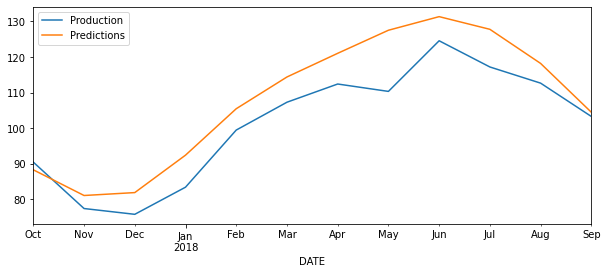

In [227]:
compare.plot(figsize = (10, 4))
plt.show()

#### Calculation R2 Score and Error Metrics

In [228]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7234484191793877 
mae: 0.05085817850670917 
mse: 0.0034487748722216004 
rmse: 0.05872627071610797


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [229]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [230]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [231]:
len(df)

573

In [232]:
len(generator)

561

In [244]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh',  input_shape = (length, n_features)))#return_sequences=True,
#model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 4s 5ms/step - loss: 0.0200
Epoch 2/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0041
Epoch 3/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0039
Epoch 4/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0034
Epoch 5/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0036
Epoch 6/15
561/561 [==============================] - 3s 4ms/step - loss: 0.0032
Epoch 7/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 8/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 9/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 10/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 11/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 12/15
561/561 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 13/15
561/561 [====

In [245]:
scaled_full_data.shape

(573, 1)

In [246]:
scaled_full_data[-length:].shape

(12, 1)

In [247]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [248]:
forecast = scaler.inverse_transform(forecast)

In [249]:
forecast

array([[ 87.515102  ],
       [ 79.73315067],
       [ 79.75817858],
       [ 86.97041602],
       [ 96.55361682],
       [104.69222512],
       [110.42392854],
       [114.22990889],
       [115.03594537],
       [110.51484785],
       [102.35833847],
       [ 91.94352206]])

In [250]:
df

Production
DATE                  
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
...                ...
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    101.5866

[573 rows x 1 columns]

In [251]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [252]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [253]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

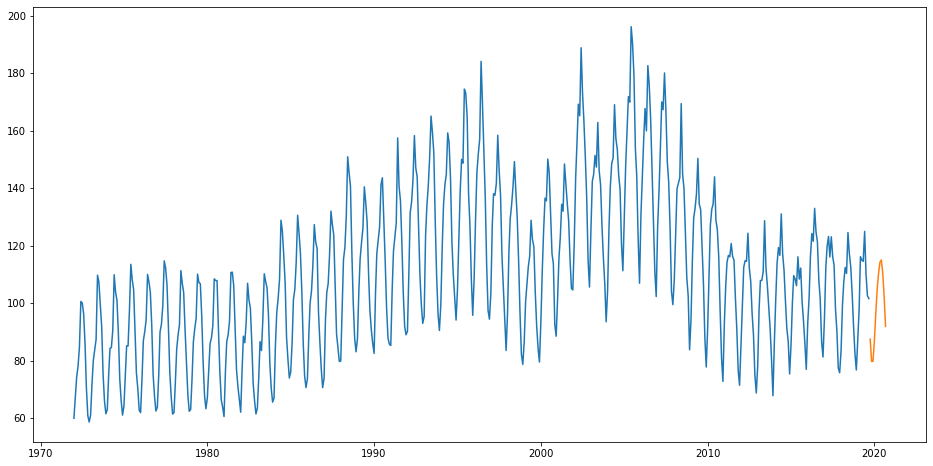

In [254]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df["Production"])
plt.plot(forecast_df.index, forecast_df['Forecast'])

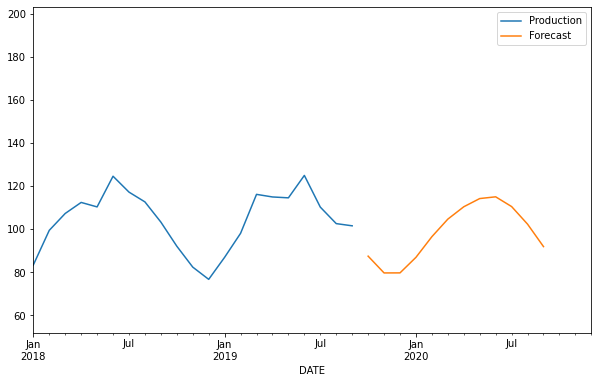

In [255]:
ax = df.plot()
forecast_df.plot(figsize = (10, 6), ax = ax)
plt.xlim('2018-01-01','2020-12-01')
plt.show()